# re_LAISS

In [1]:
import os
import numpy as np
import pandas as pd
import sys
import os
import corner
import matplotlib.pyplot as plt
import logging
from statsmodels import robust

import warnings
warnings.filterwarnings("ignore")

working_dir = os.path.abspath("")
os.chdir(working_dir)
sys.path.append('../code/')

import constants
from mod_helper_functions import *
from mod_laiss_functions import *

## Build dataset bank

In [ ]:
# Add A_V to large dataset bank

# from sfdmap2 import sfdmap

# df = pd.read_csv("../data/large_df_bank.csv")
# m = sfdmap.SFDMap('../data/sfddata-master')
# RV = 3.1
# ebv = m.ebv(df['ra'].values, df['dec'].values)
# df['A_V'] = RV * ebv
# df.to_csv("../data/large_df_bank_wAV.csv", index=False)

In [ ]:
# Join new lightcurve features to small dataset bank

# df_large = pd.read_csv("../data/large_df_bank_wAV.csv")
# df_small = pd.read_csv("../data/small_df_bank_re_laiss.csv")

# key = 'ztf_object_id'
# extra_features = [col for col in df_large.columns if col not in df_small.columns]

# merged_df = df_small.merge(df_large[[key] + extra_features], on=key, how='left')

# lc_feature_names = constants.lc_features_const.copy()
# host_feature_names = constants.host_features_const.copy()

# small_final_df = merged_df.replace([np.inf, -np.inf, -999], np.nan).dropna(subset=lc_feature_names + host_feature_names)

# small_final_df.to_csv("../data/small_hydrated_df_bank_re_laiss.csv", index=False)

In [ ]:
# lc_feature_names = constants.lc_features_const.copy()
# host_feature_names = constants.host_features_const.copy()
# raw_host_feature_names = constants.raw_host_features_const.copy()

# raw_dataset_bank = pd.read_csv('../data/large_df_bank_wAV.csv')
# print("Shape of raw dataset bank:", raw_dataset_bank.shape)

# # Impute missing values
# from sklearn.impute import KNNImputer
# X = raw_dataset_bank[lc_feature_names+raw_host_feature_names]
# feat_imputer = KNNImputer(weights='distance').fit(X)
# imputed_filt_arr = feat_imputer.transform(X)

# imputed_df = pd.DataFrame(imputed_filt_arr, columns=lc_feature_names + raw_host_feature_names)
# imputed_df.index = raw_dataset_bank.index
# raw_dataset_bank[lc_feature_names + raw_host_feature_names] = imputed_df

# imputed__df_bank = raw_dataset_bank
# print("Shape of imputed dataset bank:", imputed__df_bank.shape)

# # Build final dataset bank
# dataset_bank = re_build_dataset_bank(raw_df_bank=imputed__df_bank, av_in_raw_df_bank=True, path_to_sfd_folder="../data/sfddata-master", building_entire_df_bank=True)
# final_dataset_bank = dataset_bank.replace([np.inf, -np.inf, -999], np.nan).dropna(subset=lc_feature_names + host_feature_names)

# # Write dataset bank to .csv
# print("Shape of final dataset bank:", final_dataset_bank.shape)
# final_dataset_bank.to_csv('../data/large_final_df_bank_new_lc_feats.csv', index=False)
# print("Successfully saved dataset bank!")

## Run re_LAISS

Building new ANNOY index with 22097 transients...
Done!

ZTF21aaublej is in dataset_bank.
Timeseries dataframe for ZTF21aaublej is already made. Continue!

Loading previously saved ANNOY index without PCA: ../data/re_LAISS/index_files/re_laiss_annoy_index_pcaFalse_19lc_18host.ann 

First neighbor is input transient, so it will be excluded. The final neighbor count will be one less than expected.
						 ZTFID     IAU_NAME SPEC  Z
Input transient: https://alerce.online/object/ZTF21aaublej 2021ixf SN Ia 0.041

Making a plot of stacked lightcurves...


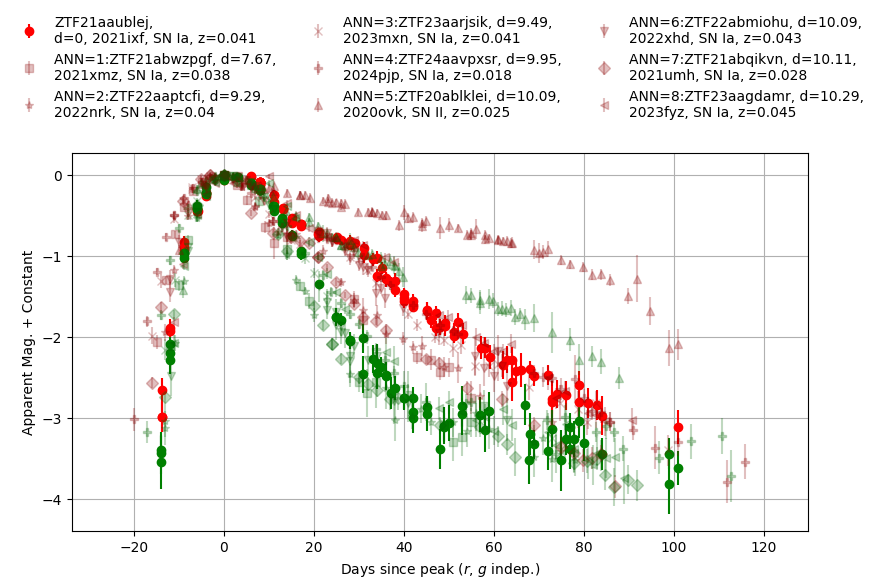


Generating hosts grid plot...


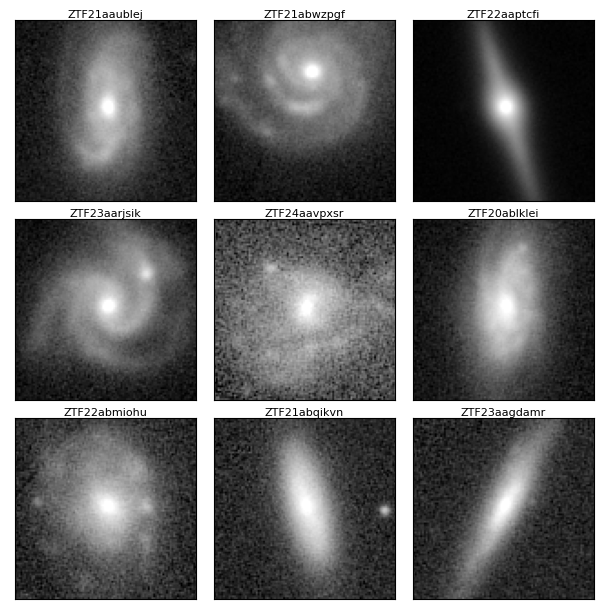

PDF written to ../figures/host_grids/ZTF21aaublej_host_thumbnails_ann=9.pdf

ANN=1: https://alerce.online/object/ZTF21abwzpgf 2021xmz SN Ia, 0.0375690013
ANN=2: https://alerce.online/object/ZTF22aaptcfi 2022nrk SN Ia, 0.039681
ANN=3: https://alerce.online/object/ZTF23aarjsik 2023mxn SN Ia, 0.0411
ANN=4: https://alerce.online/object/ZTF24aavpxsr 2024pjp SN Ia, 0.018
ANN=5: https://alerce.online/object/ZTF20ablklei 2020ovk SN II, 0.025
ANN=6: https://alerce.online/object/ZTF22abmiohu 2022xhd SN Ia, 0.043
ANN=7: https://alerce.online/object/ZTF21abqikvn 2021umh SN Ia, 0.02836
ANN=8: https://alerce.online/object/ZTF23aagdamr 2023fyz SN Ia, 0.044537

ANN elapsed_time: 0.236 s
total elapsed_time: 22.769 s



In [2]:
lc_feature_names = constants.lc_features_const.copy()
host_feature_names = constants.host_features_const.copy()

# ZTF21aaublej is Ia, ZTF18acaqdaa is TDE
# ZTF18acbwenp is anomalous
queried_ztf_id = 'ZTF21aaublej'

# theorized_lc_path = 'data/theorized_lc/slsnI.csv'
# theorized_lightcurve_df = pd.read_csv('../' + theorized_lc_path)

neighbors_df, primer_dict = re_LAISS(
    transient_ztf_id=queried_ztf_id,
    # theorized_lightcurve_df=theorized_lightcurve_df,
    # host_ztf_id_to_swap_in='ZTF21aaublej',
    path_to_dataset_bank='../data/large_final_df_bank_new_lc_feats.csv',
    path_to_timeseries_folder = '../timeseries',
    save_timeseries=True,
    host_feature_names=host_feature_names,
    lc_feature_names=lc_feature_names,
    path_to_sfd_data_folder="../data/sfddata-master",
    use_pca=False,
    num_pca_components=None,
    force_recreation_of_annoy_index=True,
    index_folder_relative_path="../data/re_LAISS/index_files",
    neighbors=9,
    num_mc_simulations=0,
    suggest_neighbor_num=False,
    max_neighbor_distance=None,
    search_k=5000,
    upweight_lc_feats_factor=1,
    run_AD=False,
    run_NN=True,
    path_to_models_directory="../models",
    path_to_figure_directory="../figures",
    n_estimators=500,
    contamination=0.02,
    max_samples=1024,
    force_AD_retrain=False,
)

## re_LAISS corner plots for performance analysis

Total number of transients for corner plots: 22097
Creating corner plot for lc_group_1...
Total number of transients for corner plot after outlier removal: 19631


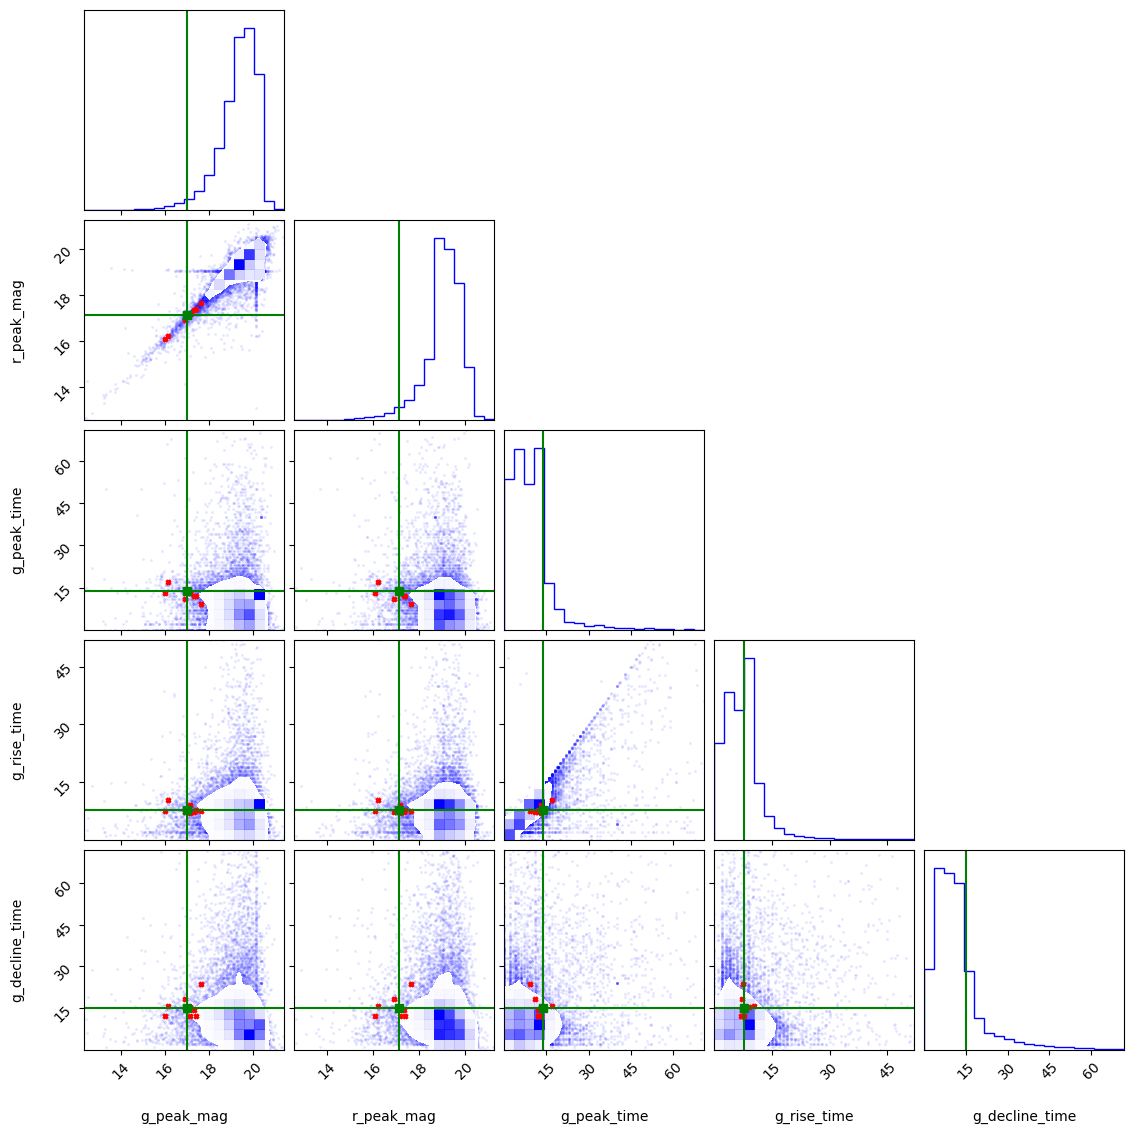

Creating corner plot for lc_group_2...
Total number of transients for corner plot after outlier removal: 19599


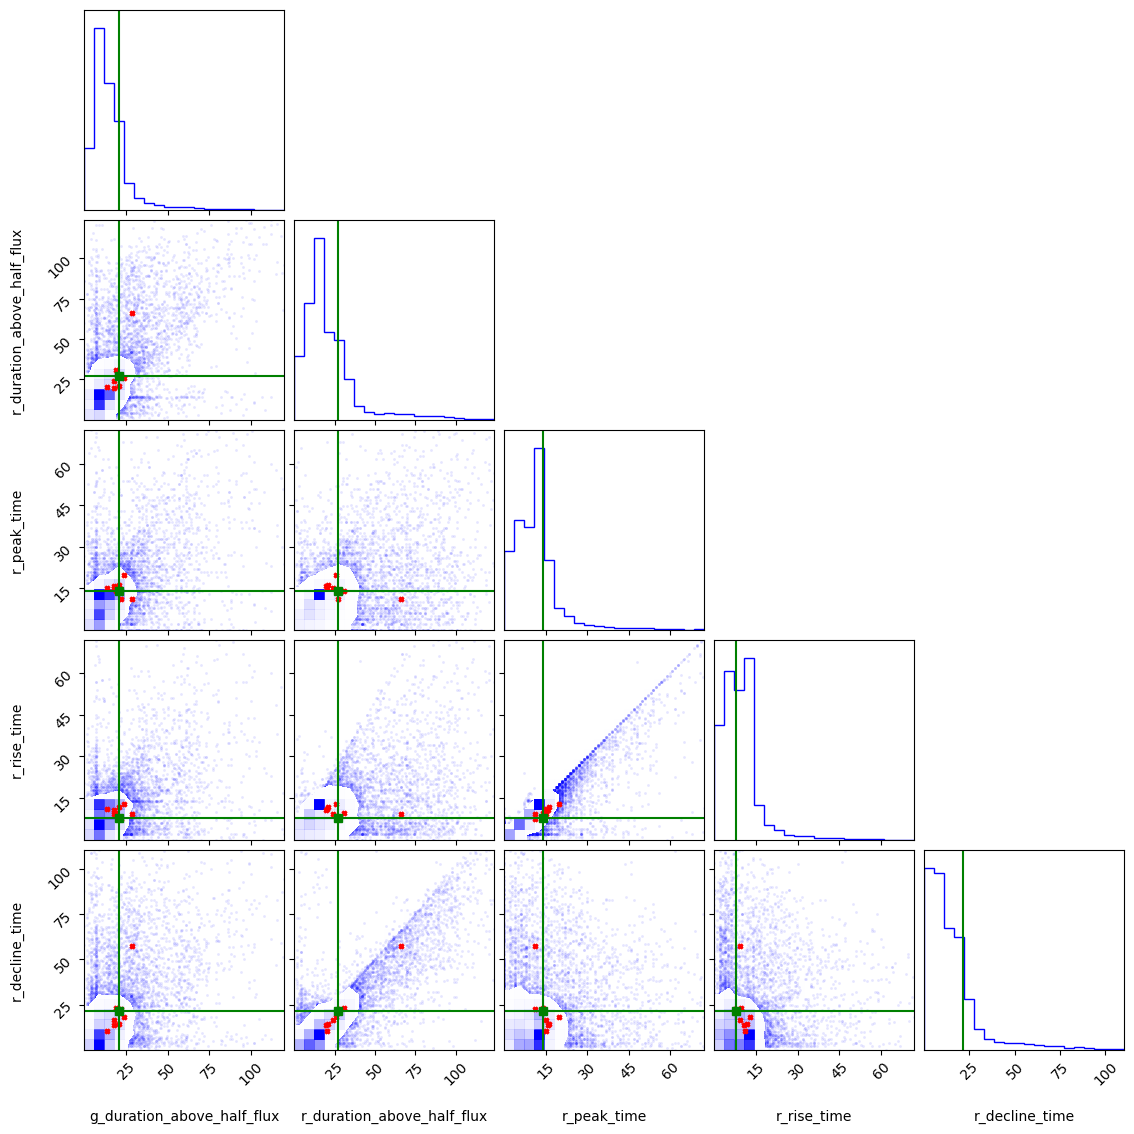

Creating corner plot for lc_group_3...
Total number of transients for corner plot after outlier removal: 19867


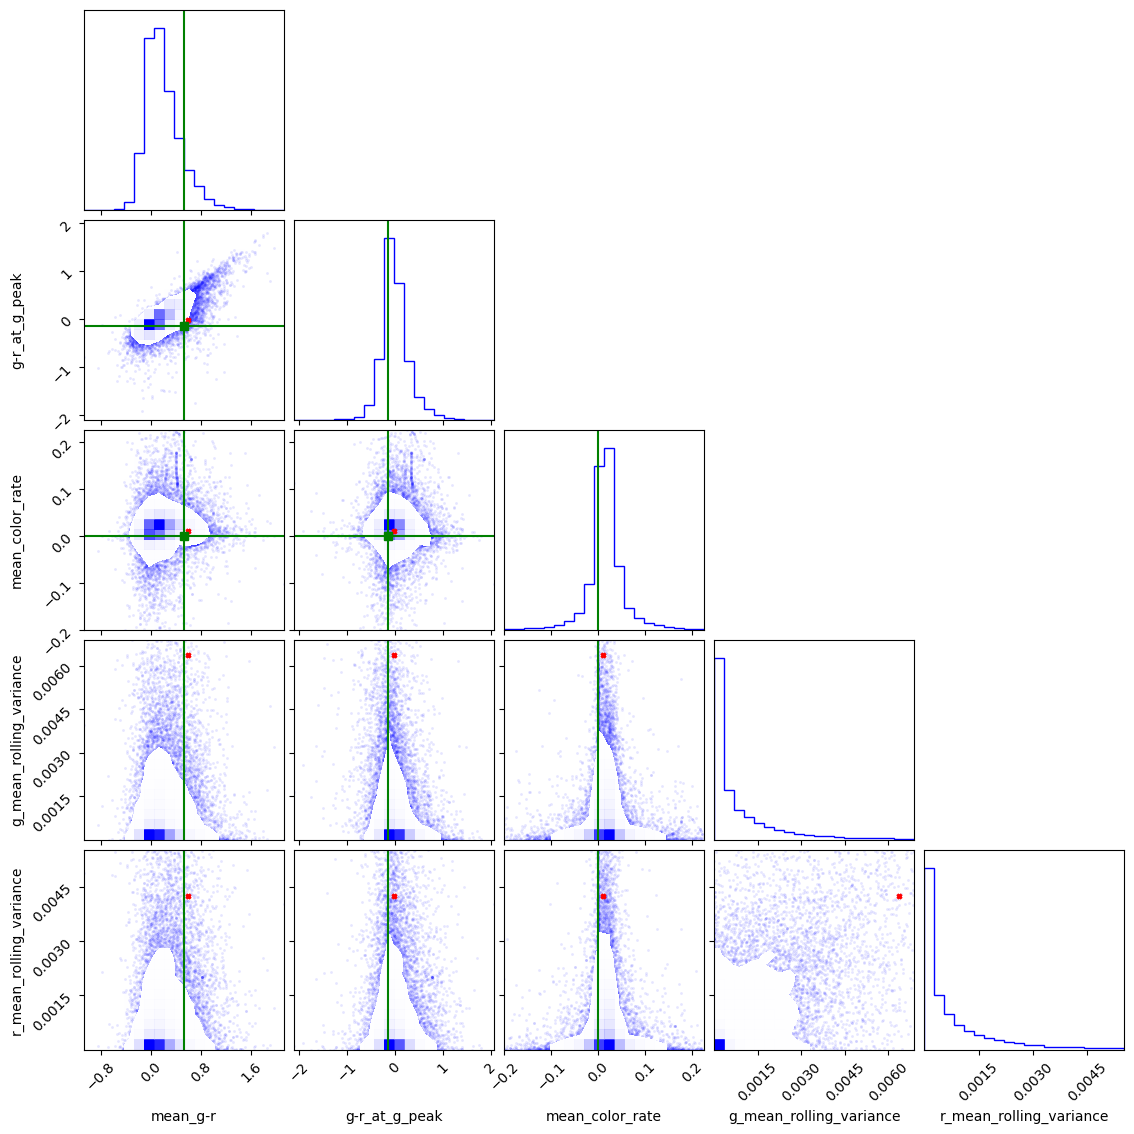

Creating corner plot for lc_group_4...
Total number of transients for corner plot after outlier removal: 19810


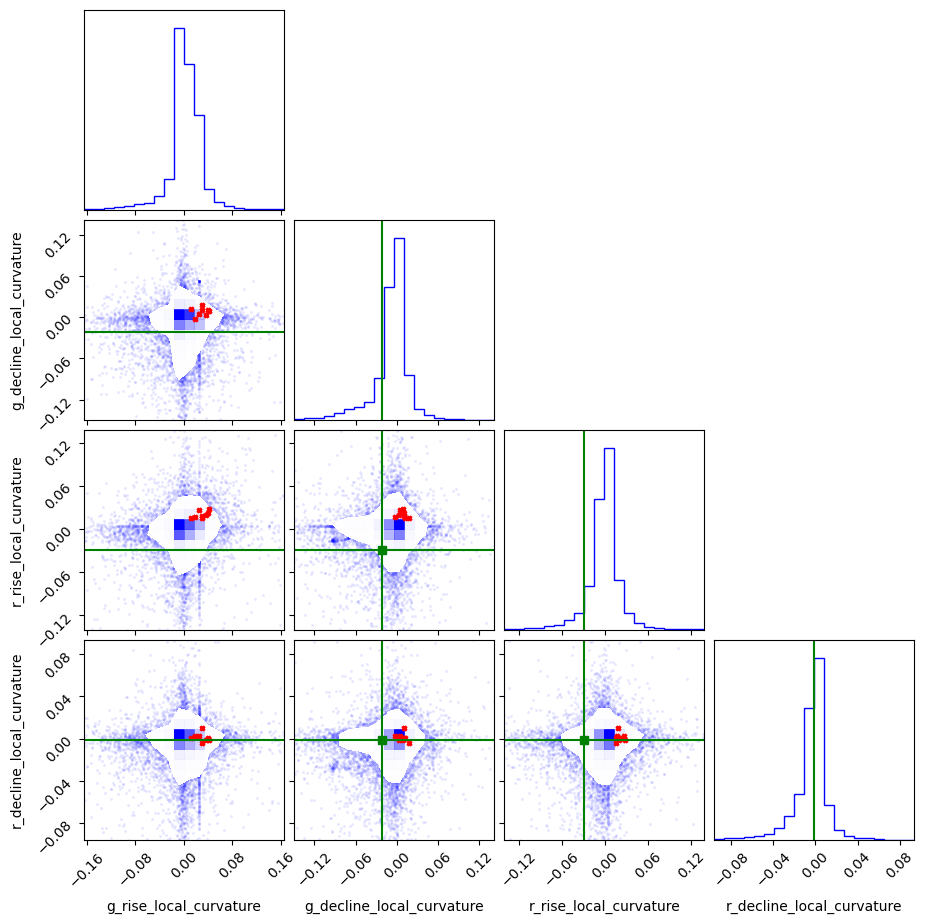

Creating corner plot for host_group_1...
Total number of transients for corner plot after outlier removal: 22073


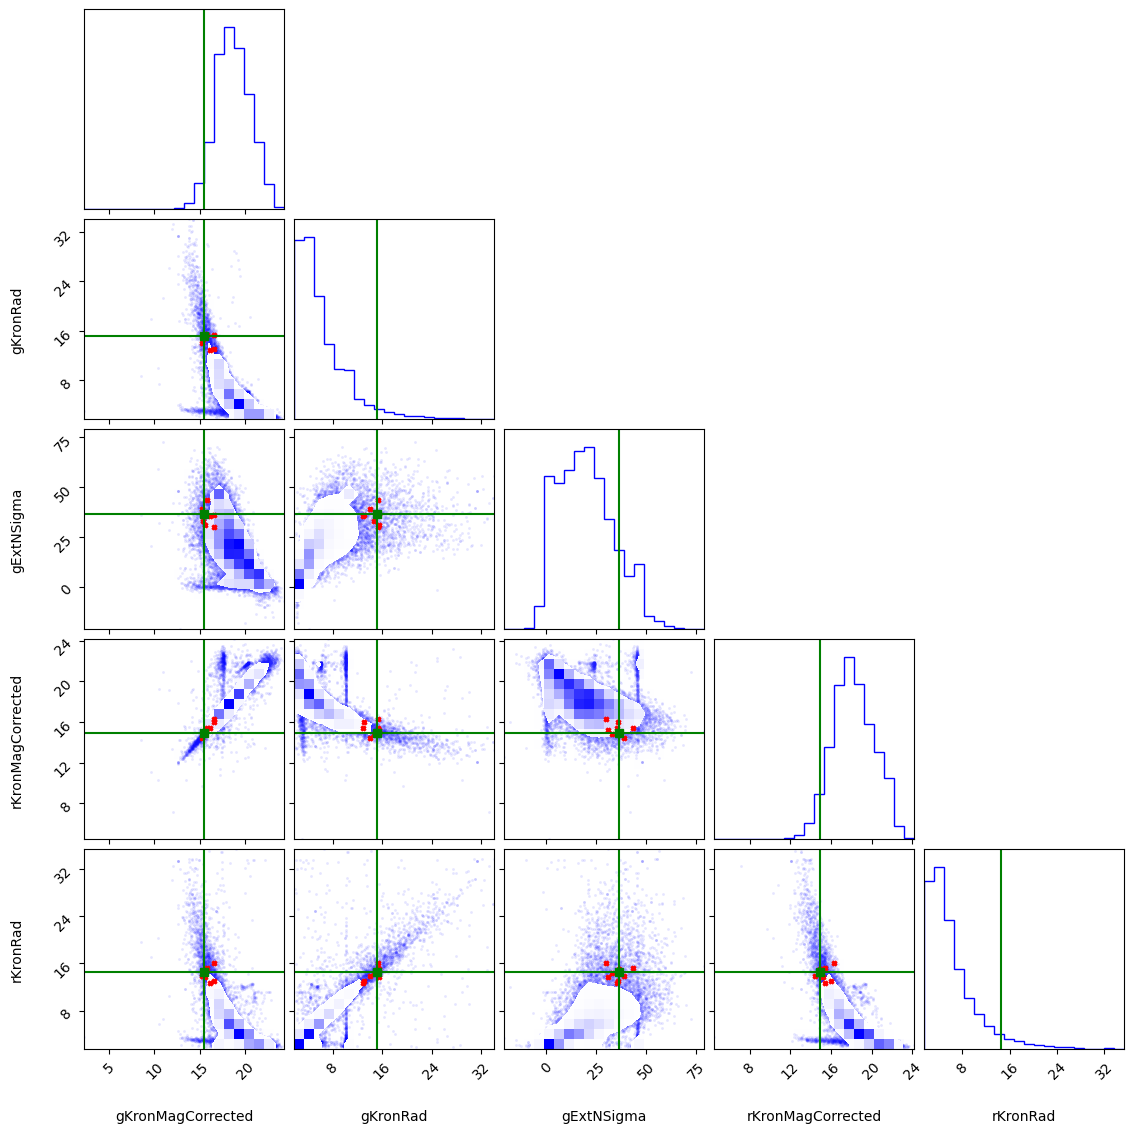

Creating corner plot for host_group_2...
Total number of transients for corner plot after outlier removal: 22074


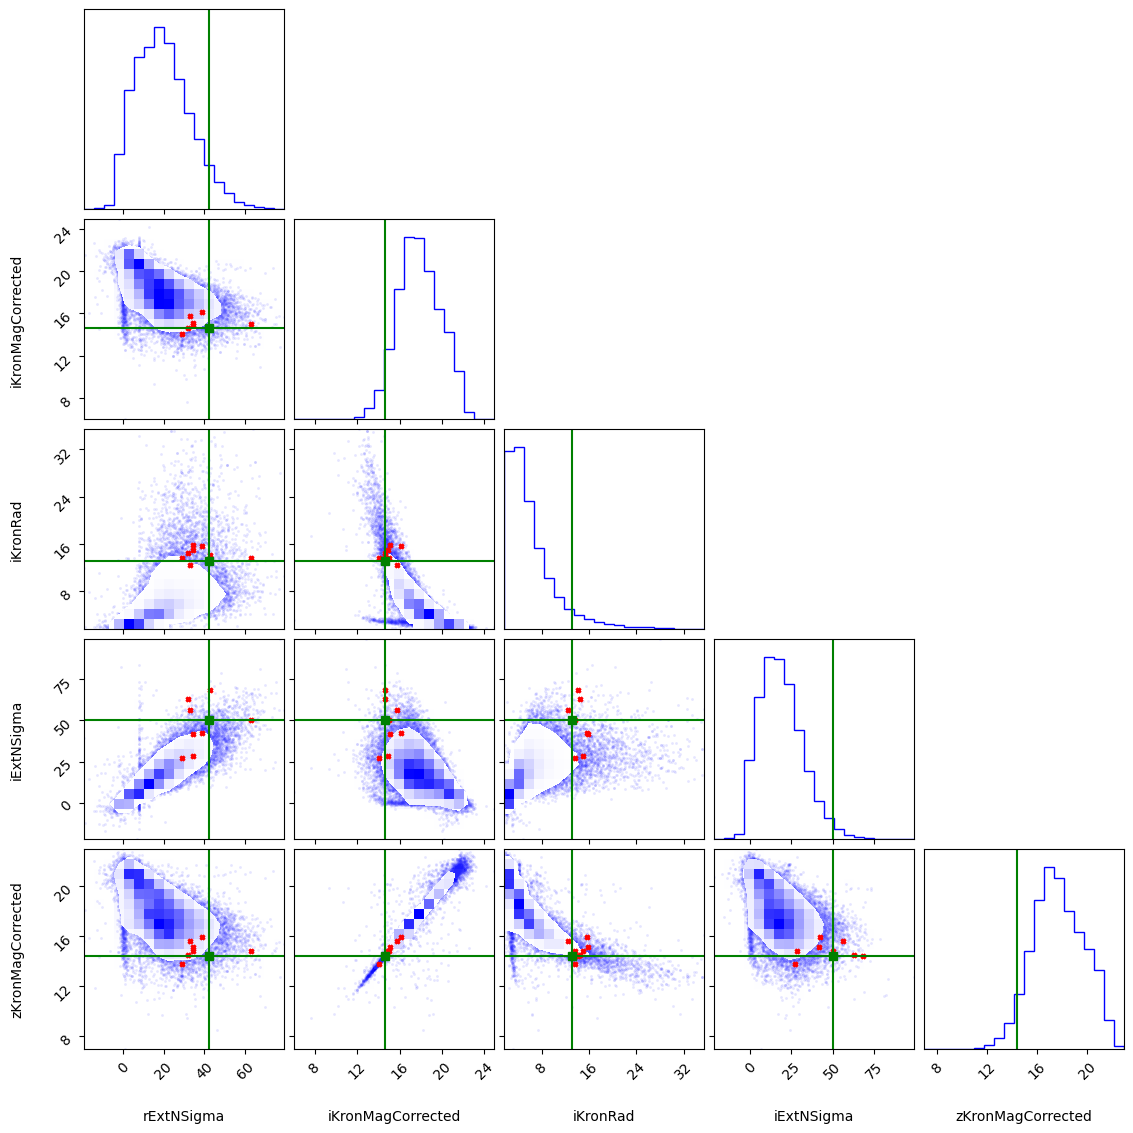

Creating corner plot for host_group_3...
Total number of transients for corner plot after outlier removal: 21057


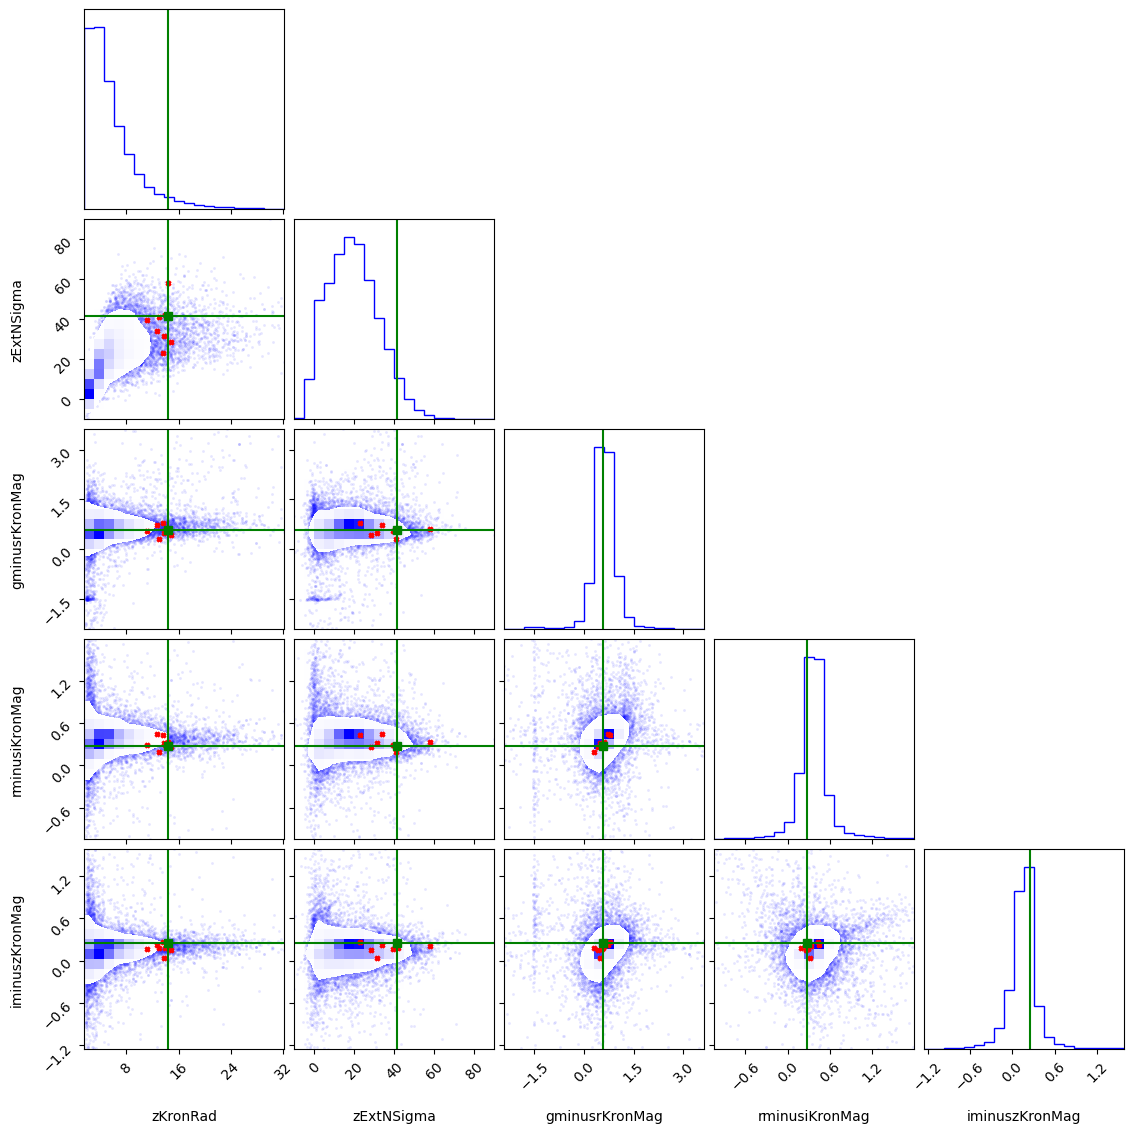

Creating corner plot for host_group_4...
Total number of transients for corner plot after outlier removal: 22096


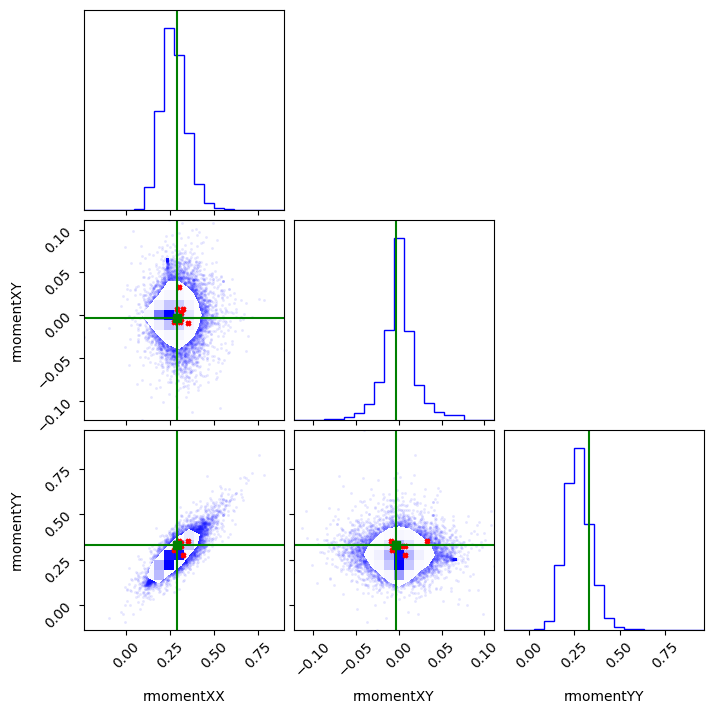

Finished creating all plots!


In [3]:
re_corner_plot(
    neighbors_df=neighbors_df,
    primer_dict=primer_dict,
    path_to_dataset_bank="../data/large_final_df_bank_new_lc_feats.csv",
    lc_feature_names=lc_feature_names,
    host_feature_names=host_feature_names,
    remove_outliers_bool=True,
    path_to_figure_directory="../figures",
)